1. 판다스 데이터 불러오기(또는 numpy)
2. 데이터 전처리
3. 신경망 구축

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./test.csv', thousands = ',') 
# thousands 천단위 자리수 구분 , 없앰

# X = np.load('snake_x.npy')
# Y = np.load('snake_y.npy') # numpy로 받지만 상하좌우 하나일 텐데?

In [35]:

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model, to_categorical

In [19]:
x[1::2]

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px391,px392,px393,px394,px395,px396,px397,px398,px399,px400
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
7,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
9,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
305,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
307,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
309,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [42]:
x = df.iloc[:,0:8]    # iloc 는 숫자 통해 400번까지 슬라이싱, 20x20 데이터를 x로 
y = df['ans']           # ans는 y, 상 0 하 1 좌 2 우 3
x_train = x[:9000]      # 초기값 :200 / 0:200 / 200:400 / 200:400 
y_train = y[:9000]
x_test =x[9000:]
y_test =y[9000:]

In [43]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(1563, 8)
(1563,)
(9000, 8)
(9000,)


In [7]:
print(x_test.iloc[0])   # x_test 형식 확인

px1      3
px2      3
px3      3
px4      3
px5      3
        ..
px396    3
px397    3
px398    3
px399    3
px400    3
Name: 11000, Length: 400, dtype: int64


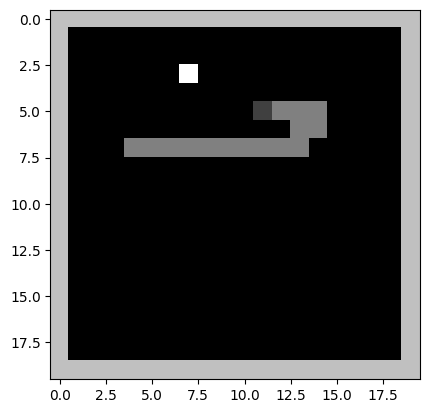

In [8]:
x1 = x_test.iloc[0].values # pandas를 numpy로 변형
x1 = x1.reshape(20,20)
plt.imshow(x1, cmap='gray')

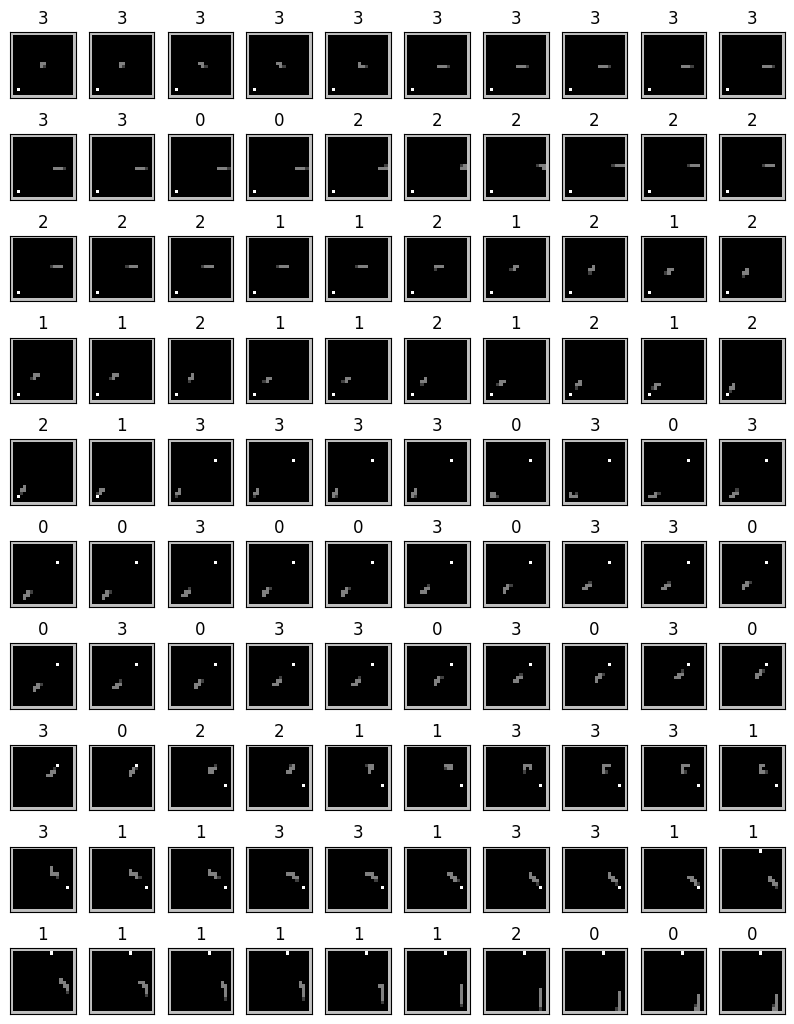

In [151]:

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 13),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    x1 = x_train.iloc[i].values
    x1 = x1.reshape(20,20)
    ax.imshow(x1, cmap = 'gray')
    ax.set_title(y_train[i])

plt.show()

In [13]:
print(y_test)

11000    2
11001    2
11002    2
11003    2
11004    2
        ..
11995    2
11996    2
11997    2
11998    2
11999    2
Name: ans, Length: 1000, dtype: int64


In [16]:
print(y_train.iloc[1:100])

1     3
2     3
3     3
4     3
5     3
     ..
95    1
96    2
97    0
98    0
99    0
Name: ans, Length: 99, dtype: int64


In [154]:
print(x_train)

       px1  px2  px3  px4  px5  px6  px7  px8  px9  px10  ...  px391  px392  \
0        3    3    3    3    3    3    3    3    3     3  ...      3      3   
1        3    3    3    3    3    3    3    3    3     3  ...      3      3   
2        3    3    3    3    3    3    3    3    3     3  ...      3      3   
3        3    3    3    3    3    3    3    3    3     3  ...      3      3   
4        3    3    3    3    3    3    3    3    3     3  ...      3      3   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
10995    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10996    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10997    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10998    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10999    3    3    3    3    3    3    3    3    3     3  ...      3      3   

       px393  px394  px395  px396  px397  px398  px

In [44]:
#plt.imshow(x_train[0], cmap='gray')

x_train = x_train.astype('float32') / 20  # 벽, 빈공간, 머리, 몸통, 사과 0~4
y_train = to_categorical(y_train) # 상하좌우 벡터로
x_test = x_test.astype('float32') / 20
y_test = to_categorical(y_test) 

In [45]:
model = Sequential([
    Dense(64, input_dim=8, activation='relu'), # 400 입력
    Dense(32, activation='relu'),
    Dense(4, activation='softmax') # 상하좌우
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# 이건 분류임?

In [46]:
hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 batch_size=32,
                 epochs=500)

Epoch 1/500
225/225 [==============================] - 1s 4ms/step - loss: 1.0851 - accuracy: 0.5604 - val_loss: 0.8441 - val_accuracy: 0.6456
Epoch 2/500
225/225 [==============================] - 1s 3ms/step - loss: 0.7365 - accuracy: 0.7382 - val_loss: 0.6006 - val_accuracy: 0.8239
Epoch 3/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5660 - accuracy: 0.8092 - val_loss: 0.4972 - val_accuracy: 0.8350
Epoch 4/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.8313 - val_loss: 0.4466 - val_accuracy: 0.8572
Epoch 5/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.8522 - val_loss: 0.3947 - val_accuracy: 0.8861
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8649 - val_loss: 0.3645 - val_accuracy: 0.8950
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8847 - val_loss: 0.3407 - val_accuracy: 0.9044

In [20]:
y_pred = model.predict(x_test)
print(y_test)
print(y_pred)

32/32 [==============================] - 0s 2ms/step
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[8.7575529e-07 2.8814134e-01 7.1185780e-01 3.4037317e-10]
 [8.7575529e-07 2.8814134e-01 7.1185780e-01 3.4037317e-10]
 [3.5628259e-06 6.2647170e-01 3.7352473e-01 6.8398811e-09]
 ...
 [8.5397559e-01 3.1401412e-22 1.5086828e-08 1.4602444e-01]
 [8.9823449e-01 3.1312013e-23 1.0740742e-08 1.0176548e-01]
 [9.3985486e-01 5.4674141e-19 2.3631123e-06 6.0142759e-02]]


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('snake1_pred.csv', y_pred, fmt='%d')

161/161 [==============================] - 1s 3ms/step - loss: 4.4288 - accuracy: 0.3681
Test accuracy 0.3680514991283417
Test loss 4.428804874420166
161/161 [==============================] - 0s 999us/step


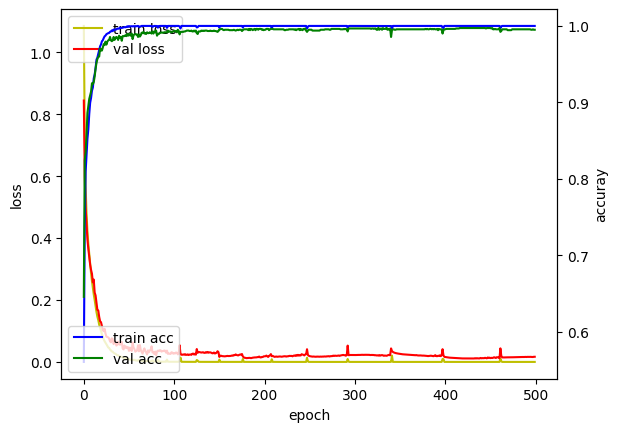

In [47]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()